# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

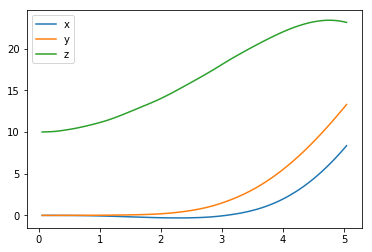

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

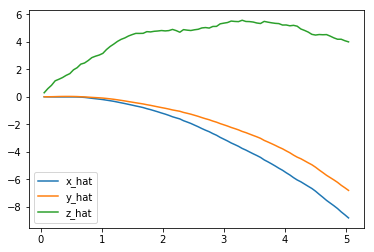

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

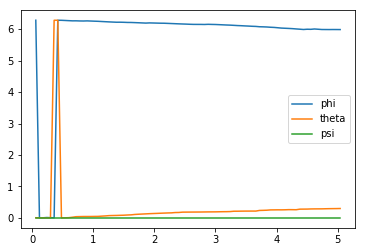

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

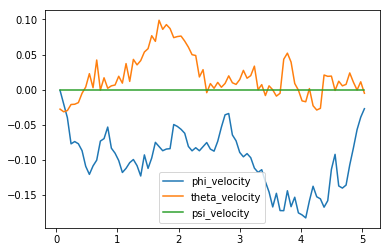

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

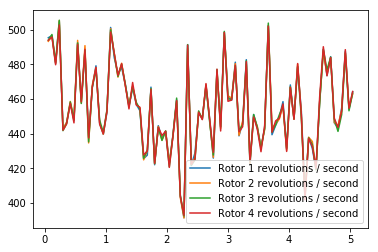

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-14.29646922 -10.14490082  31.27800125   5.98695921   0.29901413   0.        ]
[-8.82236816 -6.81859183  3.9981806 ]
[-0.02719421 -0.00512408  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.279 (best =  -0.028), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

# Test noise

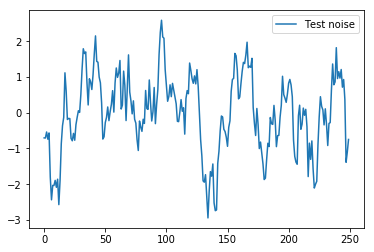

In [13]:
from agents.ou_noise import OUNoise
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

noise = OUNoise(1, 0, .1, 0.5)
n=250
res = np.zeros(n)
for i in range(n):
    res[i] = noise.sample()
    
plt.plot(range(n), res, label='Test noise')
plt.legend()
_ = plt.ylim()
    

# Plotting

In [26]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

def plot_state(fig, results, reward_log, loss_log, i_episode):
    
    ax = fig.add_subplot(421)
    ax.clear()
    ax.set_title('Position')
    ax.plot(results['time'], results['x'], label='x')
    ax.plot(results['time'], results['y'], label='y')
    ax.plot(results['time'], results['z'], label='z')
    #ax.set_ylim([0,80])
    
    ax = fig.add_subplot(422)
    ax.clear()
    ax.set_title('Velocity')
    ax.plot(results['time'], results['x_velocity'], label='x_hat')
    ax.plot(results['time'], results['y_velocity'], label='y_hat')
    ax.plot(results['time'], results['z_velocity'], label='z_hat')
    
    ax = fig.add_subplot(423)
    ax.clear()
    ax.set_title('Angle')
    ax.plot(results['time'], results['phi'], label='phi')
    ax.plot(results['time'], results['theta'], label='theta')
    ax.plot(results['time'], results['psi'], label='psi')
    ax.set_ylim([-2*3.15,2*3.14])
    
    ax = fig.add_subplot(424)
    ax.clear()
    ax.set_title('Angle velocity')
    ax.plot(results['time'], results['phi_velocity'], label='phi_velocity')
    ax.plot(results['time'], results['theta_velocity'], label='theta_velocity')
    ax.plot(results['time'], results['psi_velocity'], label='psi_velocity')
    
    ax = fig.add_subplot(425)
    ax.clear()
    ax.set_title('Action: Rotor speed command')
    ax.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
    ax.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
    ax.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
    ax.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
    ax.set_ylim([0,900])
    
    ax = fig.add_subplot(4,2,6)
    ax.clear()
    ax.set_title('Reward')
    ax.plot(results['time'], results['reward'], label='Reward')
    #ax.plot(range(1, i_episode+1), reward_log[:i_episode], label='reward')

    ax = fig.add_subplot(4,2,7)
    ax.clear()
    ax.set_title('Total reward log')
    ax.plot(range(1, i_episode+1), reward_log[:i_episode], label='avg reward')
    #ax.plot(range(1, i_episode+1), loss_log[:i_episode], label='loss')
    
    #ax = fig.add_subplot(4,2,8)
    #ax.clear()
    #ax.set_title('Agent loss log')
    
    ax = fig.add_subplot(4,2,8)
    #ax.clear() # Hold on
    ax.set_title('Flight log (z)')
    ax.plot(results['time'], results['z'], label='z')
    
    fig.show()
    fig.canvas.draw()

def print_state(task):
    print(task.sim.pose)
    print(task.sim.v)
    print(task.sim.angular_v)
    
def plot_reward(reward_log, num_episodes):
    ## Plot the rewards.
    plt.figure()
    plt.plot(range(1, num_episodes+1), reward_log, label='reward')
    plt.xlabel('episode (#)')
    plt.ylabel('reward')
    plt.legend()
    _ = plt.ylim()
    
def plot_z(z, num_episodes):
    ## Plot the rewards.
    plt.figure()
    plt.plot(range(1, num_episodes+1), z, label='z')
    plt.xlabel('episode (#)')
    plt.ylabel('reward')
    plt.legend()
    _ = plt.ylim()
    
def plot_3d_trajectory(results):
    # code stolen from internet
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    import matplotlib.pyplot as plt

    mpl.rcParams['legend.fontsize'] = 10

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(results['x'], results['y'], results['z'], label='flight')
    ax.legend()
    plt.show()

# Utils

In [45]:
def check_gpu():
    # Check keras and gpu
    print("Using Keras version: " + keras.__version__)
    gpuList = K.tensorflow_backend._get_available_gpus()
    print(gpuList)
    if(len(gpuList) < 1):
        print("WARNING: No available gpus")
    
def execute_episode(act, task, agent, train=True):
    #logging
    nof_actions = 0
    labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
              'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
              'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'reward']
    results = {x : [] for x in labels}
    
    reward_sum = 0
    if train:
        state = agent.reset_episode(agent.task.runtime) # start a new training episode
    else:
        state = agent.reset_episode(15.) # start a new evaluation episode
                
    while True:
        nof_actions +=1
        action = act(state) # = rotor speeds

        next_state, reward, done, rotor_speeds_used = task.step(action)
        
        reward_sum += reward
        
        if train:
            agent.step(action, reward, next_state, done)
        state = next_state
        
        # logging
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds_used) + [reward]
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        # episode done
        if done:
            break
            
    #if(not train):
        # Save actor if final reward exceeds the previous best
        # Only save actor executed without exploration noise
    agent.save_actor(reward)
        
    return results, reward, reward_sum
        
def execute_training(agent, task, num_episodes=1000):


    # Do it!
    total_reward_log = np.full((num_episodes, 1), -np.inf)
    mean_reward_log = np.full((num_episodes, 1), -np.inf)
    total_loss_log = np.full((num_episodes, 1), -np.inf)
    final_z_log = np.full((num_episodes, 1), -np.inf)
    for i_episode in range(1, num_episodes+1):
        
        # explore with target model
        target_results, reward_avg, reward_sum  = execute_episode(agent.act, task, agent)
        
        # explore with best target model ever known
        #target_results, reward_avg, reward_sum  = execute_episode(agent.act_best_explore, task, agent) 
        #plot_state(fig, target_results, total_reward_log, total_loss_log, i_episode)
        
        # Evaluate the target model without noise
        #target_results, reward_avg, reward_sum = execute_episode(agent.act_target, task, agent, False)
        total_reward_log[i_episode-1] = reward_sum+1
        mean_reward_log[i_episode-1] = reward_avg
        total_loss_log[i_episode-1] = agent.loss
        final_z_log[i_episode-1] = target_results['z'][-1]
        
        #plot_state(fig, target_results, total_reward_log, total_loss_log, i_episode)
        
        # Print the evaluation result
        print("\rEpisode = {:4d}, tot_reward = {:7.3f}, final_z = {:7.3f}, (best_avg_reward = {:7.3f}), actor_loss = {}".format(
            i_episode, reward_sum+1, target_results['z'][-1], agent.actor_best_score, agent.loss), end="")  # [debug]
    sys.stdout.flush()
      
    # setup plots
    fig = plt.figure(1)
    plt.ion()
    fig.show()
    fig.canvas.draw()  
    plot_state(fig, target_results, total_reward_log, total_loss_log, i_episode)
    plot_z(final_z_log,i_episode)
    
    # Test the best actor
    target_best_results, _, _ = execute_episode(agent.act_best, task, agent, False)
    fig = plt.figure()
    plt.ioff()
    fig.show()
    fig.canvas.draw()
    plot_state(fig, target_best_results, total_reward_log, total_loss_log, i_episode)
        
    sys.stdout.flush()
    return target_best_results, total_reward_log, total_loss_log, final_z_log, mean_reward_log

## Lift and stay

Using Keras version: 2.1.5
['/gpu:0']
Actor model:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 27)                0         
_________________________________________________________________
dense_497 (Dense)            (None, 128)               3584      
_________________________________________________________________
batch_normalization_409 (Bat (None, 128)               512       
_________________________________________________________________
dense_498 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_410 (Bat (None, 256)               1024      
_________________________________________________________________
dense_499 (Dense)            (None, 128)               32896     
_________________________________________________________________
raw_actions (Dense)      

<IPython.core.display.Javascript object>


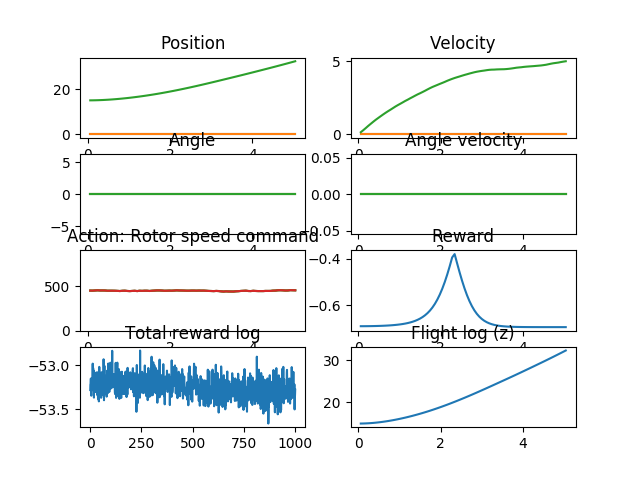

<IPython.core.display.Javascript object>


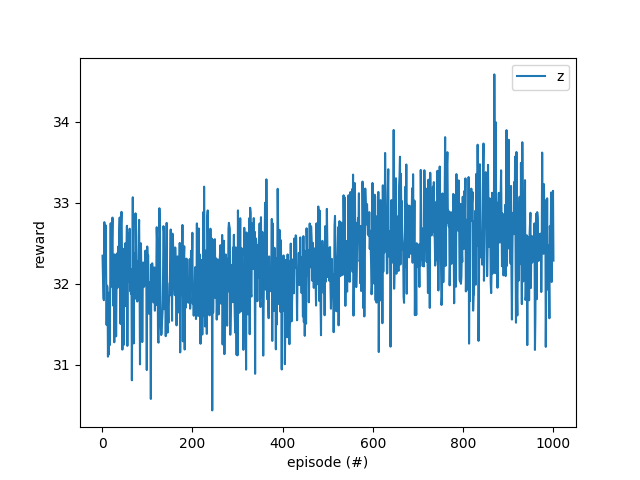

<IPython.core.display.Javascript object>


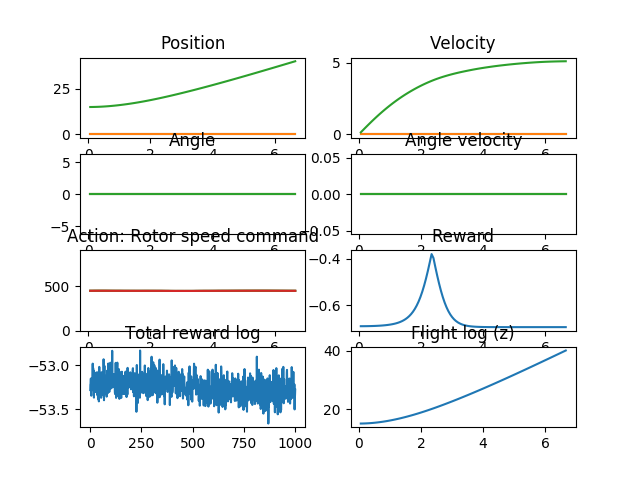

In [53]:
#%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import sys
import pandas as pd
import numpy as np

from agents.ddpg import DDPG
from tasks.task_hover import Task
import keras
from keras import backend as K

# Hyperparameter
num_episodes = 1000
gamma = 0.99 # discount
tau = 0.01 # update of target model
exploration_mu=0.
exploration_theta=0.1 
exploration_sigma=1.5
lr_actor = 1e-7
lr_critic= 1e-6

check_gpu()
    
initial_pose = np.array([0., 0., 15., 0., 0., 0.])
target_pos   = np.array([0., 0., 20.])
action_size = 1
# Init task and agent
task = Task(target_pos=target_pos, init_pose=initial_pose, action_size=action_size, runtime=5.)
agent = DDPG(task, gamma, tau, exploration_mu, exploration_theta, exploration_sigma, lr_critic, lr_actor) 

# Execute
results, reward_log, loss_log, final_z_log, mean_reward_log = execute_training(agent, task, num_episodes)


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

<IPython.core.display.Javascript object>


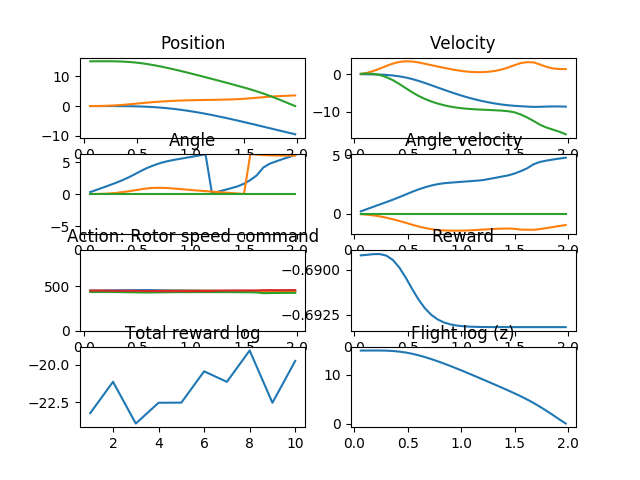

In [52]:
# See above

fig = plt.figure()
plt.ioff()
fig.show()
fig.canvas.draw()
plot_state(fig, results, reward_log, loss_log, len(loss_log))

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
- I did the lift from 15m to 20m and stay there task. 
- I tried many different rewards functions.
  - Penalty on distance from target.
  - Penalty on squared distance from target.
  - Reward when staying close to target.
  - Penalty when crashing
  - Penalty on velocity
  - Penalty on angle velocity
  - Reward long flight time
  - Normalized and not normalized reward
    In general I think a continous reward function seems to work best with the learning algoritm. I belive discrete steps in the reward function ca be hard for the net to understand
  - Final reward function:
    In the final implementation I use a simle norm of the distance from target passed through a simgmoid function for normalization. I belived that this simple function also takes care of angle and speed since bad angle and speed will result in a long distance to the target.
    
- Also tested
  - Stopping the agent when exceeding above 2*target position. Otherwise too much bad samples with be included in the replay buffer.
  - Only one output from the actor, applying it to all rotors
  - Introducing 5 outputs from the actor. [base_rotor_spd, delta_rotor_1, delta_rotor_2, delta_rotor_3, delta_rotor_4]
  

  

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I used DDPG since it should perform better on a continuous action space. Inspiration from the DDPG paper, https://arxiv.org/pdf/1509.02971.pdf.

- As state parameters i have [position error, angles] instead of default [position, angles]. This way the final net will be able to receive new target positions.

- Final choise of hyperparameters:
 * gamma = 0.99 # discount
 * tau = 0.01 # update of target model
   * tau is the low pass parameter between updated net and target net. weights of these target networks are updated                                by slowly tracking the learned networks
 * Noise
     * exploration_mu=0.
     * exploration_theta=0.15 
     * exploration_sigma=1.5
       * Test a wide range of different sigmas from 100 to 0.01
         * Too high sigma introduces too much bad memories in the buffer but can also push the net out of local minimas
         * Too low sigma gives very little exploration and the net gets stuck in local minimas.
 * Actor
   * lr_actor =1e-7
   * lr_decay =0
     * Tried decay without any visible difference
 * Critic
   * lr_critic=1e-5
   * lr_decay=0
     * Tried decay without any visible difference
 * Replay buffer
   * Replay buffer size: 1 000 000
   * Replay batch size: 64
   * I tried a prioritized replay buffer, selecting memories with high reward with higher probability. Inpired by: http://pemami4911.github.io/paper-summaries/deep-rl/2016/01/26/prioritizing-experience-replay.html
 * Action repeat
   * I tested to increase action repeat. in my final version I am using 5.
- Neural network architecture
 * Several different architechures was tested
     * Normalization
       * Tested with and without batch normalization on each layer as stated in the ddpg paper
       "One approach to this problem is to manually scale the features so they are in similar ranges across environments and units.  We address this issue by adapting a recent technique from deep learning called batch normalization"
       * Also tested to scale the input action and states with fixed known max values
     * Tested different number of units
     * Tested with dropout layer and differnet dropout rate
     * With and without different initializers for both kernel and bias
     * Regularizers
       * Tested
         - kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer).
         - activity_regularizer: Regularizer function applied to the output of the layer (its "activation"). 

 * Final net: See Keras.summary() output above
          

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- The task was hard to learn. I also tried landing an take off. I never managed to get any agents to stay at the target position for several epochs. 
  * To solve this I tried alot of hyperparameter tuning with learning rates from 1e-2 to 1e-7. A lower learning rate took my agent to the target but it always degraded after some episodes.
  * One approach to solve this was to continously save the best actor and run this in parallell each epoch with noise. This did not help much and my target agent was still degrades after some epochs.
  * I tried to simplify the task by limiting the action space to 1 rotor speed and using this speed for all rotors. This sometimes worked but often with big occillations around the goal position.
- The learning curve was often an aha moment but most of the time the actor dropped to bad performance again. I therefore continously saved the best agent.
- The final performance of my best agent was: 
  * Big occillations around the target position. 
  * Several agents that managed to stay in the air for the maximum runtime (100s)
  * 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Hardes part has been to specify the reward function.
- There are much parameters to play around with:
   * Hyperparameters
   * Net structure
   * Simulation environment
     * Corrected one divide ny zero. (J = V / (n * D))
   * Runtime
   * Action repeat
   * Task reward
  They are all important and interconnected.